In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Conversion factor
PIXELS_PER_MICRON = 6

In [14]:
# List of CSV files and their conditions
csv_files = ["WTA_exp_measure.csv", "58A_exp_measure.csv"]  # Add more as needed
conditions = ["WT", "58A"]  # Corresponding labels

In [15]:
# Data storage
results = []

In [16]:
for csv_file, condition in zip(csv_files, conditions):
    df = pd.read_csv(csv_file)
    
    lengths = df["Length"].values / PIXELS_PER_MICRON
    widths = df["Width"].values / PIXELS_PER_MICRON
    areas = df["Area"].values / (PIXELS_PER_MICRON ** 2)
    aspect_ratios = lengths / widths
    
    # Store statistics
    results.append({
        "Condition": condition,
        "Mean Length": np.mean(lengths), "Std Length": np.std(lengths),
        "Mean Width": np.mean(widths), "Std Width": np.std(widths),
        "Mean Aspect Ratio": np.mean(aspect_ratios), "Std Aspect Ratio": np.std(aspect_ratios),
        "Mean Area": np.mean(areas), "Std Area": np.std(areas)
    })

In [17]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

  Condition  Mean Length  Std Length  Mean Width  Std Width  \
0        WT     4.493138    1.022288    1.183870   0.212862   
1       58A     2.817698    0.691532    1.049215   0.178453   

   Mean Aspect Ratio  Std Aspect Ratio  Mean Area  Std Area  
0           3.850010          0.878012   3.955357  1.027304  
1           2.779397          0.856666   2.223881  0.568605  


In [18]:
# Create separate bar plots for each feature
features = ["Mean Length", "Mean Width", "Mean Aspect Ratio", "Mean Area"]
std_features = ["Std Length", "Std Width", "Std Aspect Ratio", "Std Area"]

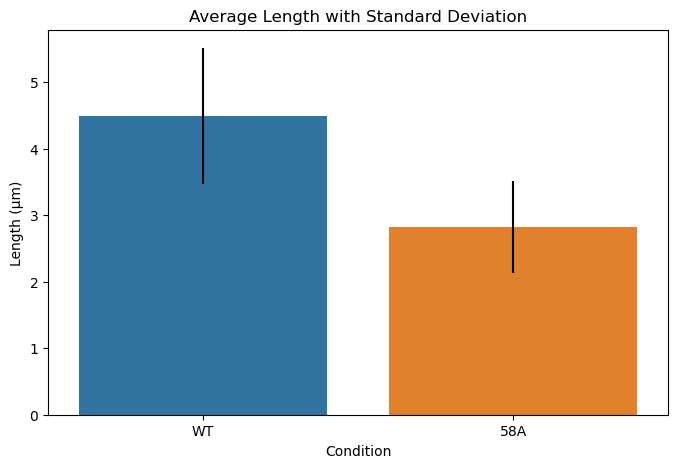

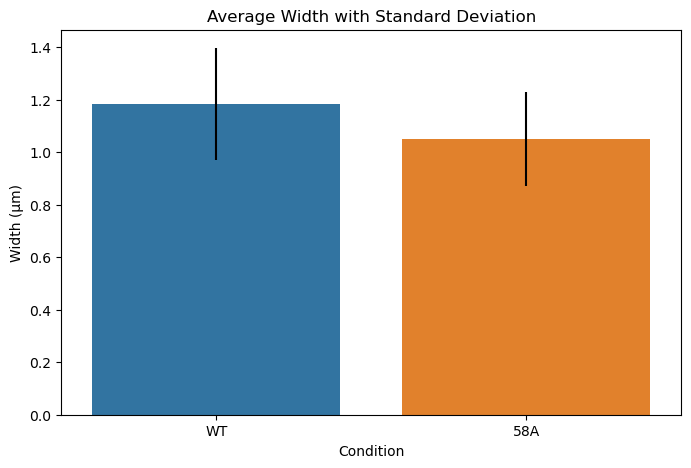

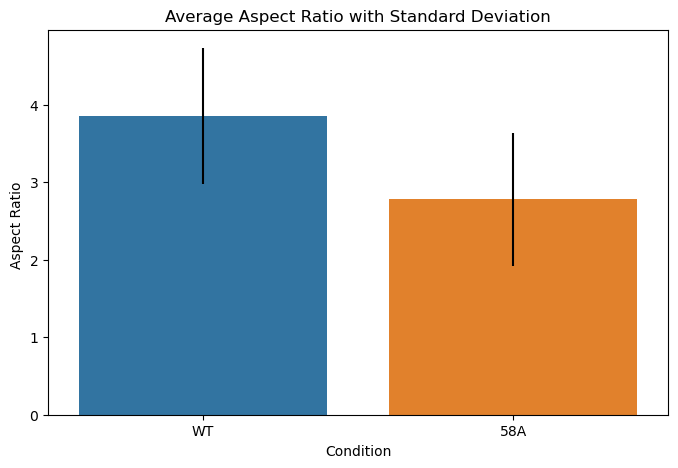

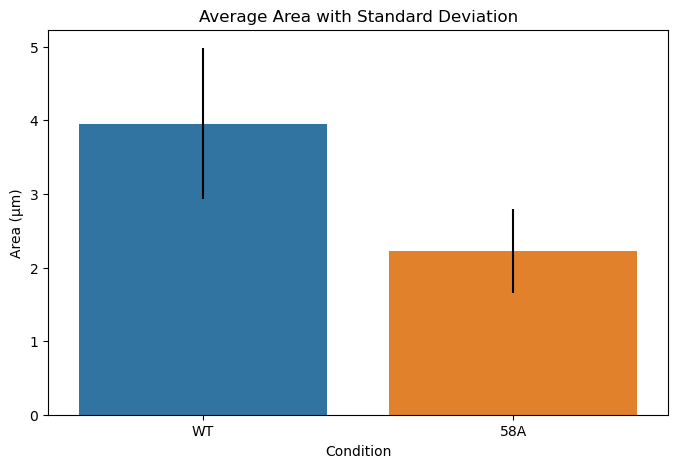

In [22]:
for feature, std_feature in zip(features, std_features):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=results_df["Condition"], y=results_df[feature], yerr=results_df[std_feature], capsize=0.2)
    plt.title(f'Average {feature.replace("Mean ", "")} with Standard Deviation')
    unit = "(µm)" if "Aspect Ratio" not in feature else ""
    plt.ylabel(f'{feature.replace("Mean ", "")} {unit}')
    plt.savefig(f"{feature.replace(' ', '_').lower()}_comparison.png", dpi=300, bbox_inches='tight')
    plt.show()